# JS Image Eigenvalue Reduction through SVD, U * Sigma * V.T

In [2]:
import numpy as np
from numpy.linalg import multi_dot

%matplotlib inline
import numpy as np

from matplotlib.pyplot import *
from pylab import subplots, show
import matplotlib.pyplot as plt

In [4]:
# Original Image Matrix
J = plt.imread('JS2_1024.JPG')

# Red Channel
J = J[:,:,0]

J_Cond = np.linalg.cond(J)
# print('\n Condition Number of Isolated Channel - Red')
# print(J_Cond)
# Condition Number: 9576222.885843676

# print('\n Original J')
# print(J)

UJ, DJ, VJ = np.linalg.svd(J)

# print('\n UJ')
# print(UJ)

# print('\n diagonal of DJ')
# print(np.diag(DJ))

# print('\n VJ')
# print(VJ)

# Reconstructed Image Matrix, U * Sigma * V.T
reconJ = multi_dot([UJ,np.diag(DJ),VJ])

# print('\n Recon J')
# print(reconJ)

# Verification that Reconstructed Image Matrix = Original Matrix
# Output Should be True
print('\n Recon J = J, (Recon J Not Reduced)')
print(np.allclose(reconJ, J))

print('\n')

# Number of Eigenvalues to be Reduced to
#n = 1024
#n = 50
n = 10

reconJ1 = multi_dot([UJ[:,:n], np.diag(DJ[:n]), VJ[:n,:]])

# print('\n Reduced UJ shape')
# print(UJ[:,:n].shape)

# print('\n Reduced diagonal of DJ shape')
# print(np.diag(DJ[:n]).shape)

# print('\n Reduced VJ shape')
# print(VJ[:n,:].shape)

# print('\n Recon J1 (Reducing)')
# print(reconJ1)

# Verification that Eigenvalue Reduced Reconstructed Image Matrix = Original Matrix
# Output Should be False
print('\n Recon J1 = J, (Recon J1 Reduced)')
print(np.allclose(reconJ1, J))


 Recon J = J, (Recon J Not Reduced)
True



 Recon J1 = J, (Recon J1 Reduced)
False


Text(0.5, 1.0, 'Image Map of ReconJ1, Eigenvalues = 10')

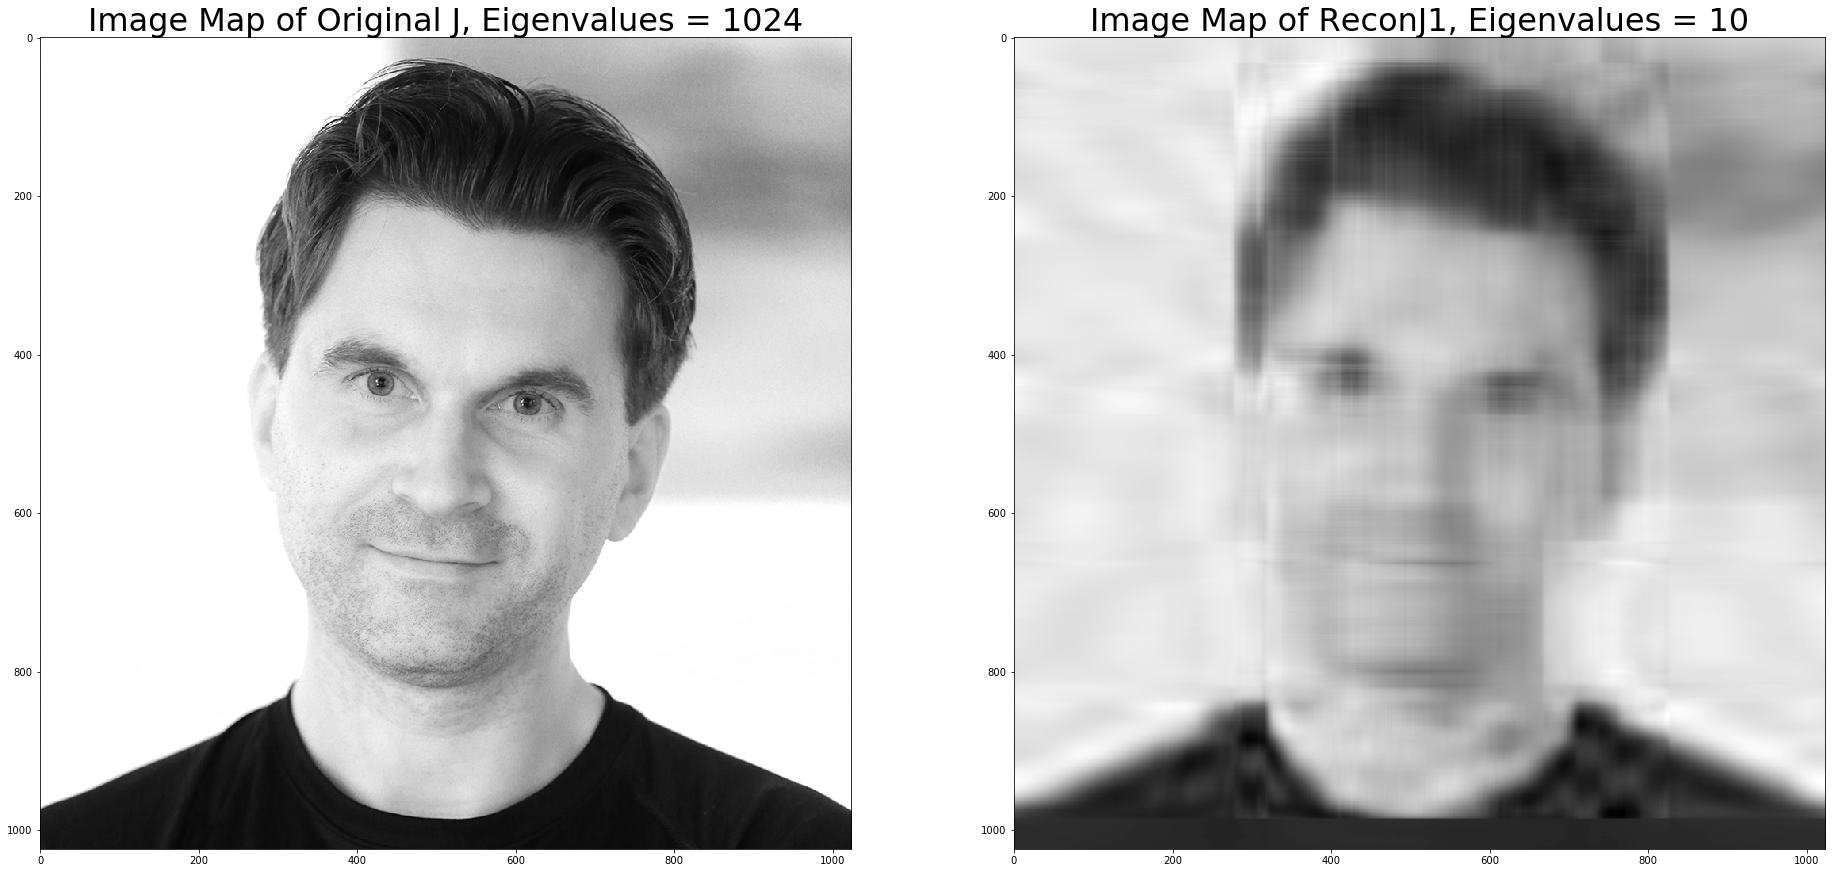

In [6]:
cmap = cm.gray

figs = 32 # figsize
fts = 32 # fontsize

fig, axes = subplots(1,2, figsize = (figs,figs))

axes[0].imshow(J, cmap = cmap, interpolation = "nearest")
axes[0].set_title('Image Map of Original J, Eigenvalues = 1024', fontsize = fts)

axes[1].imshow(reconJ1, cmap = cmap, interpolation = "nearest")
axes[1].set_title('Image Map of ReconJ1, Eigenvalues = 10', fontsize = fts)